# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were two of the drugs whose tumor levels in this study were smallest by the end of the data measurements. There was an even split between male and female mouses studied. The true effectiveness of these drugs would be better displayed using a subplot compairing the mean of tumor size vs time for each drug to show true effectiveness. 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice.
numofmice = len(total_data["Mouse ID"].unique())
numofmice

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
total_data['Mouse ID'].value_counts()


g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.DataFrame(total_data[total_data['Mouse ID'].str.contains("g989")])

#assuming we need to drop all of g989...? 
#13 values while most have 10 (because 0 - 45, 10 intervals)
#and these values only go to 35,seems like corrupt data..?

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = total_data.drop(total_data[total_data['Mouse ID'] == 'g989'].index)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [51]:
# Checking the number of mice in the clean DataFrame.
numofmice = len(clean_data["Mouse ID"].unique())
numofmice

248

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
    
Tumor_DF = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": std, "Standard Error of the Mean": SEM})
Tumor_DF

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

agg_df = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
meanagg = agg_df.agg('mean')
medianagg = agg_df.agg('median')
varagg =  agg_df.agg('var')
stdagg = agg_df.agg('std')
semagg = agg_df.agg('sem')

TumorAgg_DF = pd.DataFrame({"Mean": meanagg, "Median": medianagg, "Variance": varagg, "Standard Deviation": stdagg, "Standard Error of the Mean": semagg})
TumorAgg_DF

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoint'>

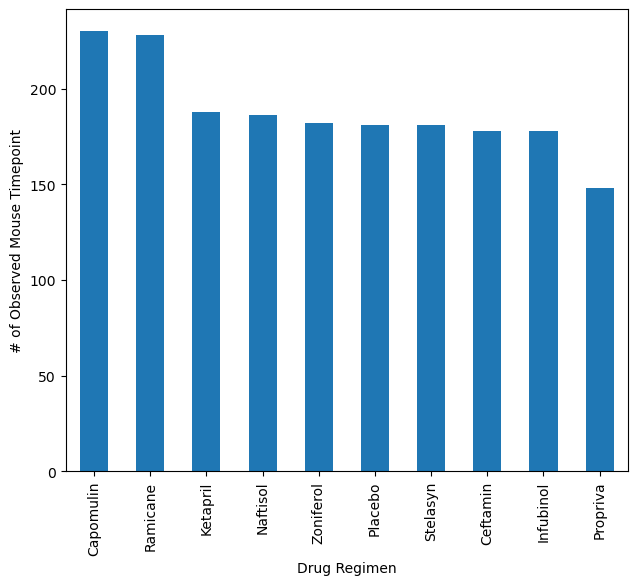

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = clean_data.groupby(['Drug Regimen'])['Timepoint'].count()
count = count.sort_values(ascending=False)
count.plot(kind='bar', ylabel='# of Observed Mouse Timepoint',
         xlabel='Drug Regimen', figsize=(7.25, 6))

Text(38.097222222222214, 0.5, '# of Observed Mouse Timepoint')

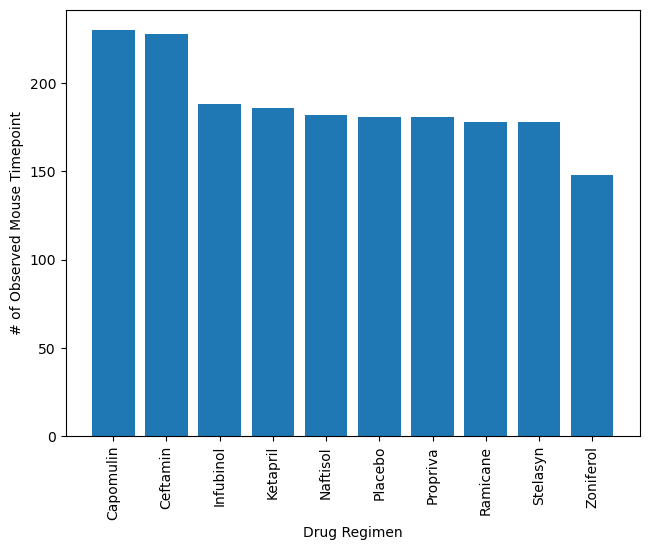

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_ax = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(x_ax,count,align="center")
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')

<Axes: ylabel='Sex'>

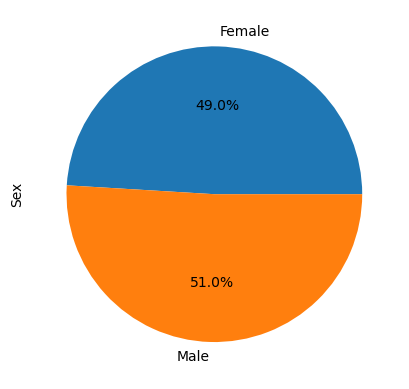

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mvf = clean_data.groupby(['Sex'])['Mouse ID'].count()
mvf

mvf.plot.pie(autopct='%1.1f%%', ylabel = 'Sex')

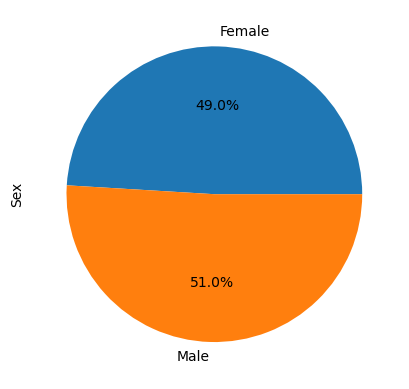

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plt.pie(mvf , labels = labels, autopct = "%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
new = clean_data.set_index('Drug Regimen')
data = new.drop(['Naftisol','Placebo', 'Propriva', 'Ketapril', 'Stelasyn', 'Zoniferol'])
data = data.reset_index()
data = data.groupby(['Mouse ID'])['Timepoint'].max()

tp_data = pd.DataFrame(data)
tp_df = pd.merge(clean_data,tp_data, on = ('Mouse ID', 'Timepoint'), how ='right')
tp_df
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
Cap = []
Ram = []
Inf = []
Ceft = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # added idx because i copied syntax from stackoverflow link, couldnt figure out why i could do just normal for loop
for idx, row in tp_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        Cap.append(float(row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == 'Ramicane':
        Ram.append(float(row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == 'Infubinol':
        Inf.append(float(row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == 'Ceftamin':
        Ceft.append(float(row['Tumor Volume (mm3)']))
    # add subset 
    # Determine outliers using upper and lower bounds
itsnotatumah = pd.DataFrame ({drugs[0]: Cap, drugs[1]: Ram, drugs[2]: Inf, drugs[3]: Ceft})
CapDF = itsnotatumah['Capomulin']
RamDF = itsnotatumah['Ramicane']
InfDF = itsnotatumah['Infubinol']
CeftDF = itsnotatumah['Ceftamin']

max = itsnotatumah.max()
min = itsnotatumah.min()
print(max)
print(min)

QCap = CapDF.quantile([.25,.5,.75])
QRam = RamDF.quantile([.25,.5,.75])
QInf = InfDF.quantile([.25,.5,.75])
QCeft = CeftDF.quantile([.25,.5,.75])

LQCap = QCap[.25]
LQRam = QRam[.25]
LQInf = QInf[.25]
LQCeft = QCeft[.25]

UQCap = QCap[.75]
UQRam = QRam[.75]
UQInf = QInf[.75]
UQCeft = QCeft[.75]

IQRCap = UQCap - LQCap
IQRRam = UQRam - LQRam
IQRInf = UQInf - LQInf
IQRCeft = UQCeft - LQCeft

LBCap = LQCap - (1.5*IQRCap)
LBRam = LQRam - (1.5*IQRRam)
LBInf = LQInf - (1.5*IQRInf)
LBCeft = LQCeft - (1.5*IQRCeft)

UBCap = UQCap + (1.5*IQRCap)
UBRam = UQRam + (1.5*IQRRam)
UBInf = UQInf + (1.5*IQRInf)
UBCeft = UQCeft + (1.5*IQRCeft)

BW_DF = pd.DataFrame({'Drug': drugs, "Lower Quartile": [LQCap,LQRam,LQInf,LQCeft], "Upper Quartile":[UQCap,UQRam,UQInf,UQCeft], "Lower Bound": [LBCap,LBRam,LBInf,LBCeft], "Upper Bound":[UBCap,UBRam,UBInf,UBCeft], "IQR": [IQRCap,IQRRam,IQRInf,IQRCeft] })
BW_DF = BW_DF.set_index('Drug')

print(BW_DF)
print('Infubinol has an Outlier because it has a min value of 36.321346 which is less than its Lower Bound ',{LBInf})

Capomulin    47.685963
Ramicane     45.220869
Infubinol    72.226731
Ceftamin     68.923185
dtype: float64
Capomulin    23.343598
Ramicane     22.050126
Infubinol    36.321346
Ceftamin     45.000000
dtype: float64
           Lower Quartile  Upper Quartile  Lower Bound  Upper Bound        IQR
Drug                                                                          
Capomulin       32.377357       40.159220    20.704562    51.832015   7.781863
Ramicane        31.560470       40.659006    17.912664    54.306811   9.098537
Infubinol       54.048608       65.525743    36.832905    82.741446  11.477135
Ceftamin        48.722078       64.299830    25.355450    87.666458  15.577752
Infubinol has an Outlier because it has a min value of 36.321346 which is less than its Lower Bound  {36.83290494999999}


([<matplotlib.axis.XTick at 0x21a9d571090>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

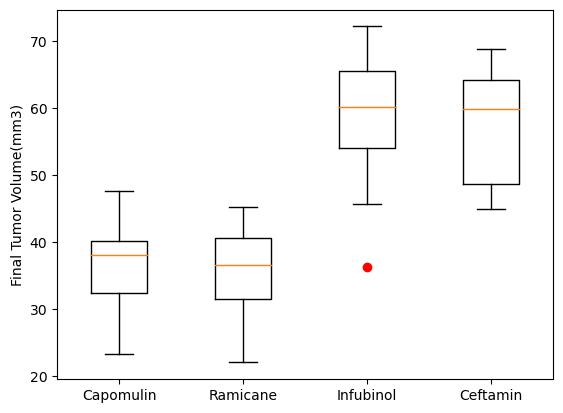

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxwhisker = [itsnotatumah[drugs[0]], itsnotatumah[drugs[1]],itsnotatumah[drugs[2]],itsnotatumah[drugs[3]]]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.boxplot(boxwhisker, 0, 'r')
plt.xticks([1,2,3,4], drugs)


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

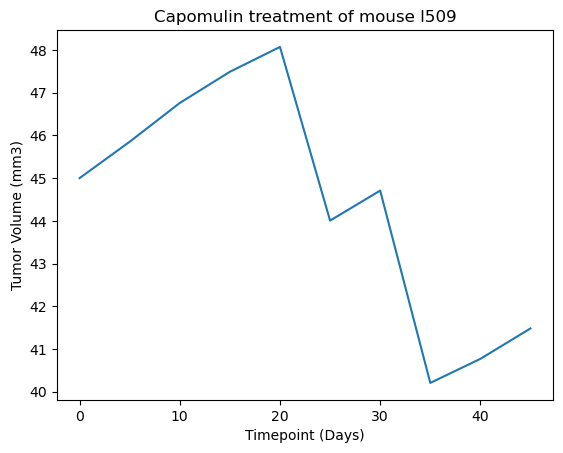

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Cap509 = clean_data.loc[clean_data["Mouse ID"] == "l509"]
Cap509

x = Cap509['Timepoint']
y = Cap509['Tumor Volume (mm3)']
df_509 = pd.DataFrame({"Timepoint (Days)": x, "Tumor Volume (mm3)": y})

line = df_509.plot.line(x='Timepoint (Days)', y='Tumor Volume (mm3)')
line.legend().set_visible(False)
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse l509")

C:\Users\matth\AppData\Local\Temp\ipykernel_14732\1791235342.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Cap_df = Cap.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

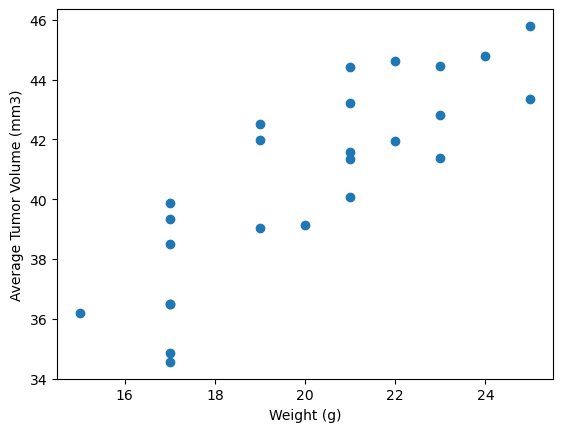

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Cap = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
Cap_df = Cap.groupby(['Mouse ID']).mean()
Cap_df = Cap_df.drop(columns = ['Timepoint','Metastatic Sites', 'Age_months'])
Cap_df

plt.scatter(Cap_df['Weight (g)'], Cap_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


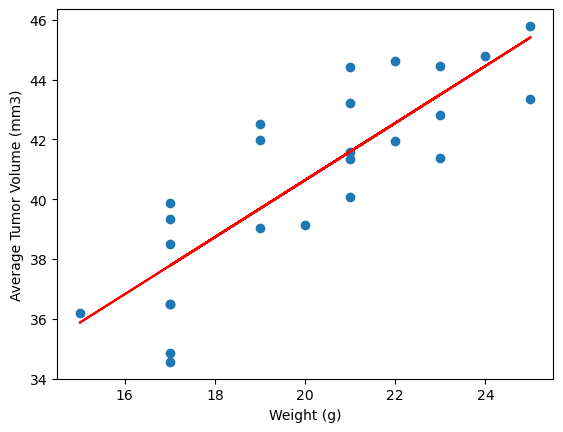

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(Cap_df['Weight (g)'], Cap_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(Cap_df['Weight (g)'], Cap_df['Tumor Volume (mm3)'])
regress_value = (Cap_df['Weight (g)'] * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Cap_df['Weight (g)'], regress_value, "r-")
print('The correlation between mouse weight and the average tumor volume is', round(rvalue,2))